# Predicting US Working Visa Applications

# 3. Feature Selection

In [1]:
#Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import itertools
from bs4 import BeautifulSoup
import urllib.request
import re
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
%config IPCompleter.greedy=True

#Display all columns in tables which were being left out before
#https://stackoverflow.com/questions/11707586/python-pandas-how-to-widen-output-display-to-see-more-columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 154 )

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 3.1 Randomly shuffle the rows of your dataset.

In [2]:
# Shuffle the rows in the cleaned dataframe, obtained from Homework1. 
df_visaType = pd.read_csv("US-Perm-Visa-CleanedData.csv")
df_visaType.sample(frac=1)
df_shuffle= df_visaType.sample(frac=1)

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,8,13,14,17,18,21,22,23,24,25,26,27,28,29,30,31,32,34,35,37,38,39,41,44,45,46,47,48,49,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_shuffle.dtypes

agent_city                        object
agent_firm_name                   object
agent_state                       object
application_type                  object
case_no                           object
case_number                       object
case_received_date                object
case_status                       object
country_of_citizenship            object
decision_date                     object
employer_address_1                object
employer_address_2                object
employer_city                     object
employer_country                  object
employer_decl_info_title          object
employer_name                     object
employer_num_employees           float64
employer_phone                    object
employer_postal_code              object
employer_state                    object
employer_yr_estab                float64
foreign_worker_info_city          object
foreign_worker_info_education     object
foreign_worker_info_inst          object
foreign_worker_i

### Datatype Issue
Above we can see that changed to datatypes made in the previous notebook have not been saved. There are only two continuous features, employer_num_employees and job_info_alt_occ_num_months. Therefore we will convert all other floats to object. 

In [4]:
df_shuffle['employer_yr_estab'] = df_shuffle['employer_yr_estab'].astype('object')
df_shuffle['fw_info_yr_rel_edu_completed'] = df_shuffle['fw_info_yr_rel_edu_completed'].astype('object')
df_shuffle['naics_us_code'] = df_shuffle['naics_us_code'].astype('object')

In [5]:
df_shuffle.dtypes

agent_city                        object
agent_firm_name                   object
agent_state                       object
application_type                  object
case_no                           object
case_number                       object
case_received_date                object
case_status                       object
country_of_citizenship            object
decision_date                     object
employer_address_1                object
employer_address_2                object
employer_city                     object
employer_country                  object
employer_decl_info_title          object
employer_name                     object
employer_num_employees           float64
employer_phone                    object
employer_postal_code              object
employer_state                    object
employer_yr_estab                 object
foreign_worker_info_city          object
foreign_worker_info_education     object
foreign_worker_info_inst          object
foreign_worker_i

In [6]:
df_shuffle.shape

(153625, 72)

We have 72 variables in the dataset, which we felt was quite a lot. We decided to investigate these variables further and drop some if necessary, in order to focus on variables of interest and with more potential predictive power. 

In [7]:
# Double checking whether there are null values in the data where values would be expected
df_shuffle.isnull().sum()

agent_city                       68458
agent_firm_name                  70028
agent_state                      69726
application_type                 95234
case_no                          95234
case_number                      58391
case_received_date               58391
case_status                          0
country_of_citizenship           11278
decision_date                        0
employer_address_1                   1
employer_address_2               59029
employer_city                        0
employer_country                 58402
employer_decl_info_title         58394
employer_name                        0
employer_num_employees           58398
employer_phone                   58393
employer_postal_code                12
employer_state                      12
employer_yr_estab                58393
foreign_worker_info_city         58392
foreign_worker_info_education    58391
foreign_worker_info_inst         59152
foreign_worker_info_major        59167
foreign_worker_info_state

As you can see there are still many variables with with a large amount of null values. We will drop any with over 60% null values. 

In [8]:
#Find columns that have less than have of the values filled in and remove them from the dataset.
for col in df_shuffle:
    if df_shuffle[col].count() < 99206:
        print(col, df_shuffle[col].count())
        df_shuffle = df_shuffle.drop([col], axis = 1)


agent_city 85167
agent_firm_name 83597
agent_state 83899
application_type 58391
case_no 58391
case_number 95234
case_received_date 95234
employer_address_2 94596
employer_country 95223
employer_decl_info_title 95231
employer_num_employees 95227
employer_phone 95232
employer_yr_estab 95232
foreign_worker_info_city 95233
foreign_worker_info_education 95234
foreign_worker_info_inst 94473
foreign_worker_info_major 94458
foreign_worker_info_state 95024
fw_info_alt_edu_experience 61982
fw_info_birth_country 61981
fw_info_education_other 61932
fw_info_postal_code 61938
fw_info_rel_occup_exp 61981
fw_info_req_experience 61982
fw_info_training_comp 61981
fw_info_yr_rel_edu_completed 61572
job_info_alt_occ 61790
job_info_alt_occ_job_title 65712
job_info_alt_occ_num_months 65660
job_info_education 95234
job_info_job_title 95231
job_info_major 94163
job_info_work_postal_code 95231
naics_us_code 61958
naics_us_title 61958
preparer_info_title 84535
pw_determ_date 95218
pw_expire_date 95218
pw_job_ti

In [9]:
df_shuffle.shape

(153625, 16)

In [10]:
df_shuffle.head()

,case_status,country_of_citizenship,decision_date,employer_address_1,employer_city,employer_name,employer_postal_code,employer_state,job_info_work_city,job_info_work_state,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,wage_offer_unit_of_pay_9089
30080,Certified,INDIA,2014-08-26,2447 NE152ND AVE,REDMOND,GREENBAY INFOTECH LLC,98052,WASHINGTON,REDMOND,WASHINGTON,Level II,15-1132,"Software Developers, Applications",OES,Year,NaN
98973,Certified,INDIA,2016-04-29,"4211, PLEASANT VALLEY ROAD",CHANTILLY,TANVI IT SOLUTIONS INC,20151,VIRGINIA,Chantilly,VIRGINIA,Level III,15-1132,"Software Developers, Applications",OES,Year,Year
117216,Certified,COLOMBIA,2016-07-08,3231 SE 6TH STREET,TOPEKA,PAYLESS SHOESOURCE,66023,KANSAS,Topeka,KANSAS,Level I,11-3071,"Transportation, Storage, and Distribution Mana...",OES,Year,Year
21414,Certified,INDIA,2013-08-30,"12337 JONES ROAD,",HOUSTON,"SAI BUSINESS SOLUTIONS, LLC.",77070,TEXAS,Houston,TEXAS,Level IV,15-1132,"Software Developers, Applications",OES,Year,NaN
113393,Certified,CANADA,2016-06-22,402 BOUCKE BUILDING,UNIVERSITY PARK,THE PENNSYLVANIA STATE UNIVERSITY,16802,PENNSYLVANIA,University Park,PENNSYLVANIA,Level I,25-1064,"Geography Teachers, Postsecondary",OES,Year,Year


We investigate the remaining variables' cardinality to narrow down our variables of interest.

In [11]:
df_shuffle.describe().T

,count,unique,top,freq
case_status,153625,2,Certified,139312
country_of_citizenship,142347,180,INDIA,92961
decision_date,153625,1176,2015-09-18,883
employer_address_1,153624,31576,211 QUALITY CIRCLE,5243
employer_city,153625,5017,NEW YORK,7753
employer_name,153625,32101,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,5248
employer_postal_code,153613,11322,77845,5249
employer_state,153613,56,CALIFORNIA,38389
job_info_work_city,153624,5642,New York,7902
job_info_work_state,153622,56,CALIFORNIA,36024


In [12]:
# We noted that employer state has 59 values, but there are 50 states in the US, so investigated this further
df_shuffle.employer_state.value_counts().unique

<bound method Series.unique of CALIFORNIA                  38389
TEXAS                       18362
NEW JERSEY                  13432
NEW YORK                    11943
ILLINOIS                     7400
MASSACHUSETTS                6070
WASHINGTON                   5574
MICHIGAN                     5554
PENNSYLVANIA                 5113
VIRGINIA                     4736
FLORIDA                      4255
GEORGIA                      4046
NORTH CAROLINA               2848
OHIO                         2505
MARYLAND                     2366
CONNECTICUT                  1633
MISSOURI                     1562
ARIZONA                      1446
WISCONSIN                    1434
INDIANA                      1393
MINNESOTA                    1357
COLORADO                     1135
TENNESSEE                     969
KENTUCKY                      757
KANSAS                        690
IOWA                          681
DISTRICT OF COLUMBIA          622
ARKANSAS                      620
NEBRASKA         

It appears that territories have been included as states, so we will rename these as one category. We also investigated the unique values for other columns to ensure no typing errors or duplicates.

In [13]:
df_shuffle.pw_level_9089.value_counts().unique

<bound method Series.unique of Level II     52185
Level IV     41047
Level III    26814
Level I      21382
Name: pw_level_9089, dtype: int64>

In [14]:
df_shuffle.pw_source_name_9089.value_counts().unique

<bound method Series.unique of OES                   139348
Other                  11422
CBA                     1610
Employer Conducted       103
SCA                       16
DBA                        1
Name: pw_source_name_9089, dtype: int64>

In [15]:
df_new = df_shuffle

In [16]:
# Group territories together
df_new.employer_state=df_shuffle.employer_state.replace('VIRGIN ISLANDS', 'TERRITORIES')
df_new.employer_state=df_shuffle.employer_state.replace('PUERTO RICO', 'TERRITORIES')
df_new.employer_state=df_shuffle.employer_state.replace('GUAM', 'TERRITORIES')
df_new.employer_state=df_shuffle.employer_state.replace('NORTH MARIANA ISLANDS', 'TERRITORIES')
df_new.employer_state=df_shuffle.employer_state.replace('NORTHERN MARIANA ISLANDS', 'TERRITORIES')

In [17]:
df_new.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
case_status,153625,2,Certified,139312
country_of_citizenship,142347,180,INDIA,92961
decision_date,153625,1176,2015-09-18,883
employer_address_1,153624,31576,211 QUALITY CIRCLE,5243
employer_city,153625,5017,NEW YORK,7753
employer_name,153625,32101,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,5248
employer_postal_code,153613,11322,77845,5249
employer_state,153613,53,CALIFORNIA,38389
job_info_work_city,153624,5642,New York,7902
job_info_work_state,153622,56,CALIFORNIA,36024


In [18]:
df_new.head(10)

,case_status,country_of_citizenship,decision_date,employer_address_1,employer_city,employer_name,employer_postal_code,employer_state,job_info_work_city,job_info_work_state,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,wage_offer_unit_of_pay_9089
30080,Certified,INDIA,2014-08-26,2447 NE152ND AVE,REDMOND,GREENBAY INFOTECH LLC,98052,WASHINGTON,REDMOND,WASHINGTON,Level II,15-1132,"Software Developers, Applications",OES,Year,NaN
98973,Certified,INDIA,2016-04-29,"4211, PLEASANT VALLEY ROAD",CHANTILLY,TANVI IT SOLUTIONS INC,20151,VIRGINIA,Chantilly,VIRGINIA,Level III,15-1132,"Software Developers, Applications",OES,Year,Year
117216,Certified,COLOMBIA,2016-07-08,3231 SE 6TH STREET,TOPEKA,PAYLESS SHOESOURCE,66023,KANSAS,Topeka,KANSAS,Level I,11-3071,"Transportation, Storage, and Distribution Mana...",OES,Year,Year
21414,Certified,INDIA,2013-08-30,"12337 JONES ROAD,",HOUSTON,"SAI BUSINESS SOLUTIONS, LLC.",77070,TEXAS,Houston,TEXAS,Level IV,15-1132,"Software Developers, Applications",OES,Year,NaN
113393,Certified,CANADA,2016-06-22,402 BOUCKE BUILDING,UNIVERSITY PARK,THE PENNSYLVANIA STATE UNIVERSITY,16802,PENNSYLVANIA,University Park,PENNSYLVANIA,Level I,25-1064,"Geography Teachers, Postsecondary",OES,Year,Year
113862,Certified,INDIA,2016-06-23,3307 HILLVIEW AVENUE,PALO ALTO,TIBCO SOFTWARE INC.,94304,CALIFORNIA,Boston,MASSACHUSETTS,Level II,15-1132,"Software Developers, Applications",OES,Year,Year
13276,Certified,TAIWAN,2013-04-18,1250 W. WISCONSIN AVENUE,MILWAUKEE,MARQUETTE UNIVERSITY,53233,WISCONSIN,Milwaukee,WISCONSIN,Level III,29-1029,"Dentists, All Other Specialists",OES,Year,NaN
11619,Certified,INDIA,2013-05-30,717 NORTH HARWOOD STREET,DALLAS,KPMG LLP,75201,TEXAS,MONTVALE,NEW JERSEY,Level IV,15-1141,Database Administrators,OES,Year,NaN
145358,Certified,INDIA,2016-11-14,500 PLAZA DRIVE,SECAUCUS,"THE CHILDREN'S PLACE SERVICES COMPANY, LLC",07094,NEW JERSEY,Secaucus,NEW JERSEY,Level II,15-1121,Computer Systems Analysts,OES,Year,Year
130880,Certified,CHINA,2016-09-02,1762 AUTOMATION PARKWAY,SAN JOSE,"HERMES MICROVISION, INC.",95131,CALIFORNIA,San Jose,CALIFORNIA,Level II,15-1133,"Software Developers, Systems Software",OES,Year,Year


We will also drop further duplicate columns that we have examined and determined have the same information, namely employer_state and job_info_work_state, employer_city and job_info_work_city.

In [19]:
df_new = df_new.drop('job_info_work_state', axis = 1)
df_new = df_new.drop('job_info_work_city', axis = 1)

In [20]:
df_new.shape

(153625, 14)

We also created a new column called case_status_code and coded the outcome of the visa application denied as 0 and certified as 1.

In [21]:
case_status_types = ['Denied', 'Certified']
df_new['case_status_code'] = df_new.case_status.astype("category", categories=case_status_types).cat.codes

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [22]:
df_new.head(5)

,case_status,country_of_citizenship,decision_date,employer_address_1,employer_city,employer_name,employer_postal_code,employer_state,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,wage_offer_unit_of_pay_9089,case_status_code
30080,Certified,INDIA,2014-08-26,2447 NE152ND AVE,REDMOND,GREENBAY INFOTECH LLC,98052,WASHINGTON,Level II,15-1132,"Software Developers, Applications",OES,Year,NaN,1
98973,Certified,INDIA,2016-04-29,"4211, PLEASANT VALLEY ROAD",CHANTILLY,TANVI IT SOLUTIONS INC,20151,VIRGINIA,Level III,15-1132,"Software Developers, Applications",OES,Year,Year,1
117216,Certified,COLOMBIA,2016-07-08,3231 SE 6TH STREET,TOPEKA,PAYLESS SHOESOURCE,66023,KANSAS,Level I,11-3071,"Transportation, Storage, and Distribution Mana...",OES,Year,Year,1
21414,Certified,INDIA,2013-08-30,"12337 JONES ROAD,",HOUSTON,"SAI BUSINESS SOLUTIONS, LLC.",77070,TEXAS,Level IV,15-1132,"Software Developers, Applications",OES,Year,NaN,1
113393,Certified,CANADA,2016-06-22,402 BOUCKE BUILDING,UNIVERSITY PARK,THE PENNSYLVANIA STATE UNIVERSITY,16802,PENNSYLVANIA,Level I,25-1064,"Geography Teachers, Postsecondary",OES,Year,Year,1


In [23]:
# Need to double check datatypes for the variables
df_new.dtypes

case_status                    object
country_of_citizenship         object
decision_date                  object
employer_address_1             object
employer_city                  object
employer_name                  object
employer_postal_code           object
employer_state                 object
pw_level_9089                  object
pw_soc_code                    object
pw_soc_title                   object
pw_source_name_9089            object
pw_unit_of_pay_9089            object
wage_offer_unit_of_pay_9089    object
case_status_code                 int8
dtype: object

In [24]:
df_new.shape

(153625, 15)

In [25]:
df_new.to_csv("US-Perm-Visa-PlottedFeaturesUnbalanced.csv", encoding='utf-8', index=False)

Now we are left with categorical variables of varying cardinality. For those with lower cardinalities, we will use stacked bar chats to plot interactions between each categorical feature and the target feature, case status. For those with very high cardinalities, we will discuss below how we dealt with them.

### 3.2 For each categorical feature, plot the pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising. Justify your choices.  

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

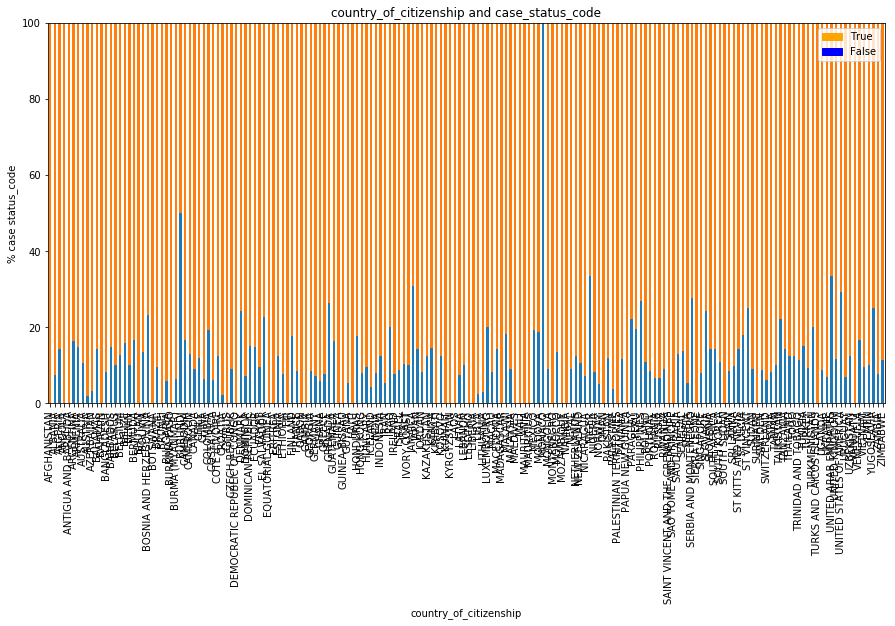

In [26]:
# country of citizenship
country_of_citizenship = pd.unique(df_new.country_of_citizenship.ravel())

df_new['percent'] = 0

for i in country_of_citizenship:
     count = 1 / df_new[df_new.country_of_citizenship == i].count()['case_status_code']
     index_list = df_new[df_new['country_of_citizenship'] == i].index.tolist()
     for j in index_list:
         df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','country_of_citizenship','case_status_code']].groupby(['country_of_citizenship','case_status_code']).sum()

# # Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="country_of_citizenship and case_status_code", figsize=(15,7))

# # Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# # Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("country_of_citizenship")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

(0, 100)

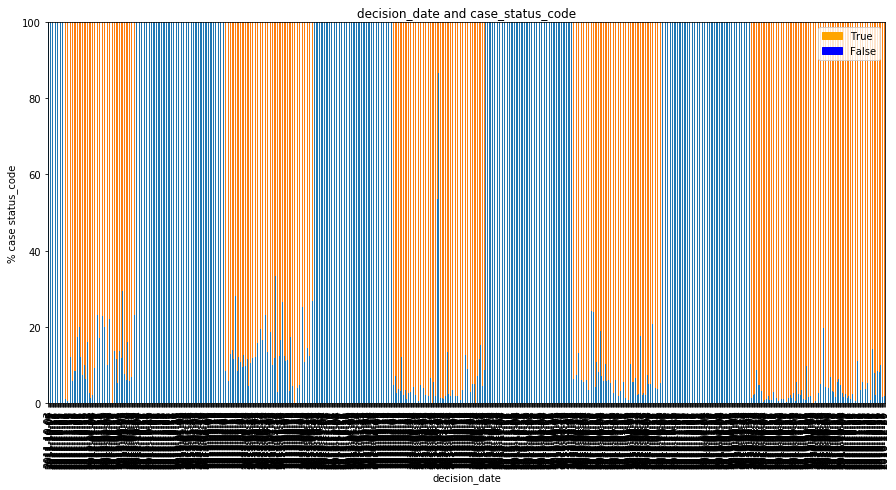

In [27]:
# decision_date                                                 
decision_date = pd.unique(df_new.decision_date.ravel())

df_new['percent'] = 0

for i in decision_date:
    count = 1 / df_new[df_new.decision_date== i].count()['decision_date']
    index_list = df_new[df_new['decision_date'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','decision_date','case_status_code']].groupby(['decision_date','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="decision_date and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("decision_date")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

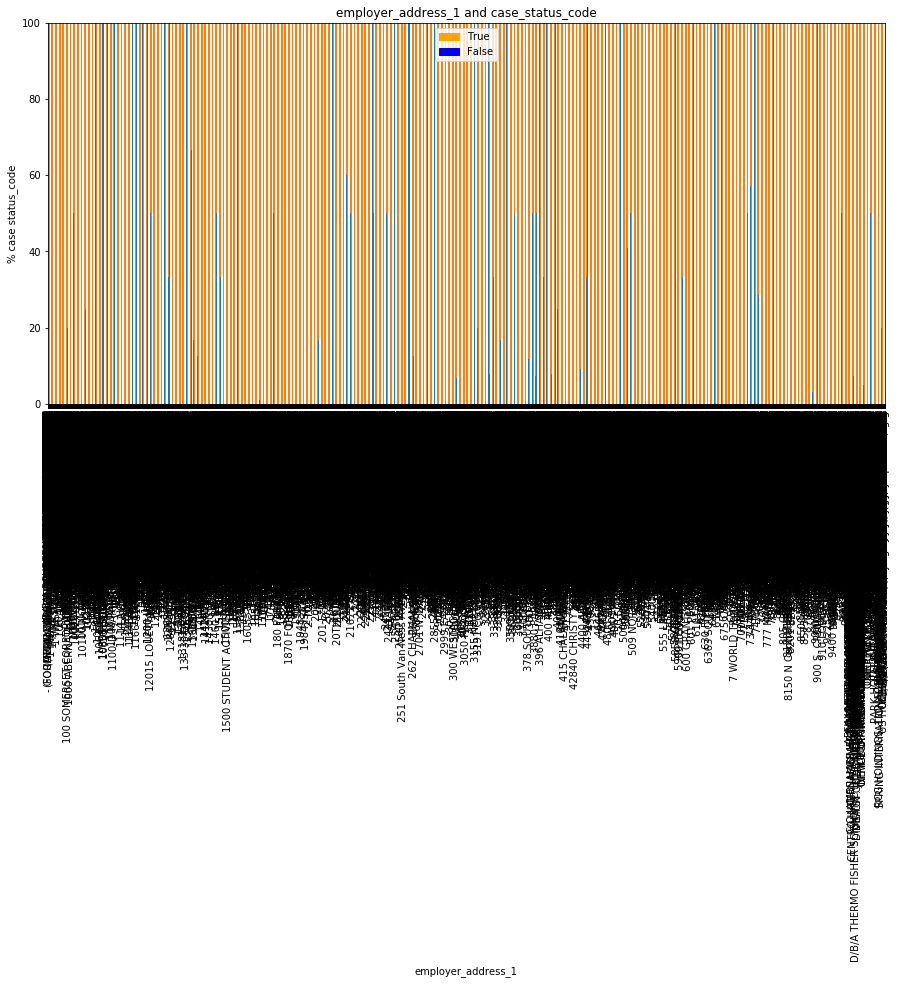

In [40]:
# employer_address_1                                                 
employer_address_1 = pd.unique(df_new.employer_address_1.ravel())

df_new['percent'] = 0

for i in employer_address_1:
    count = 1 / df_new[df_new.employer_address_1== i].count()['employer_address_1']
    index_list = df_new[df_new['employer_address_1'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','employer_address_1','case_status_code']].groupby(['employer_address_1','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="employer_address_1 and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("employer_address_1")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

(0, 100)

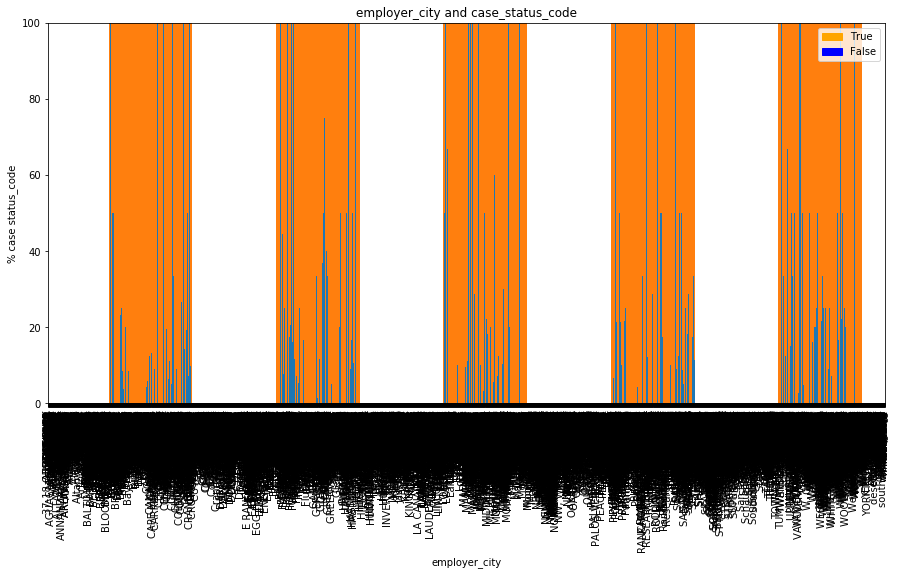

In [39]:
# employer_city                                                 
employer_city = pd.unique(df_new.employer_city.ravel())

df_new['percent'] = 0

for i in employer_city:
    count = 1 / df_new[df_new.employer_city== i].count()['employer_city']
    index_list = df_new[df_new['employer_city'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','employer_city','case_status_code']].groupby(['employer_city','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="employer_city and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("employer_city")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

(0, 100)

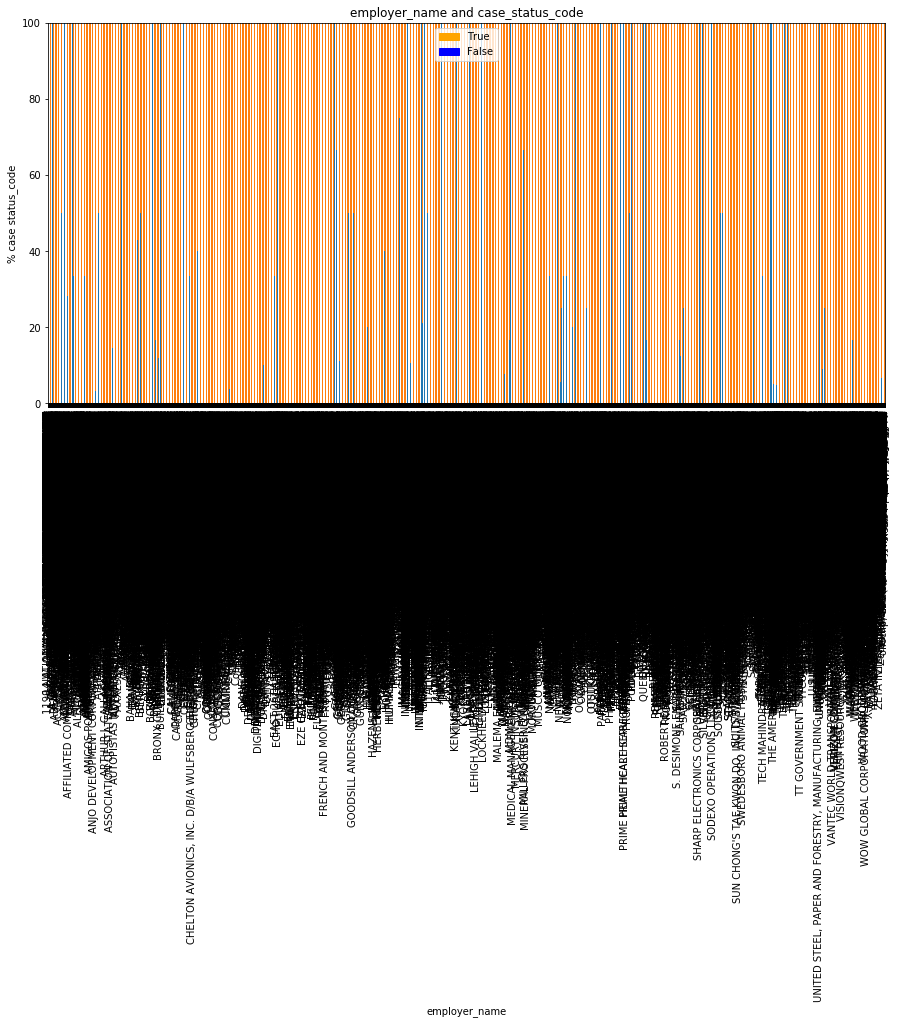

In [38]:
# employer_name                                                 
employer_name = pd.unique(df_new.employer_name.ravel())

df_new['percent'] = 0

for i in employer_name:
    count = 1 / df_new[df_new.employer_name== i].count()['employer_name']
    index_list = df_new[df_new['employer_name'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','employer_name','case_status_code']].groupby(['employer_name','case_status_code']).sum()

# # Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="employer_name and case_status_code", figsize=(15,7))

# # Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# # Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("employer_name")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])


/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

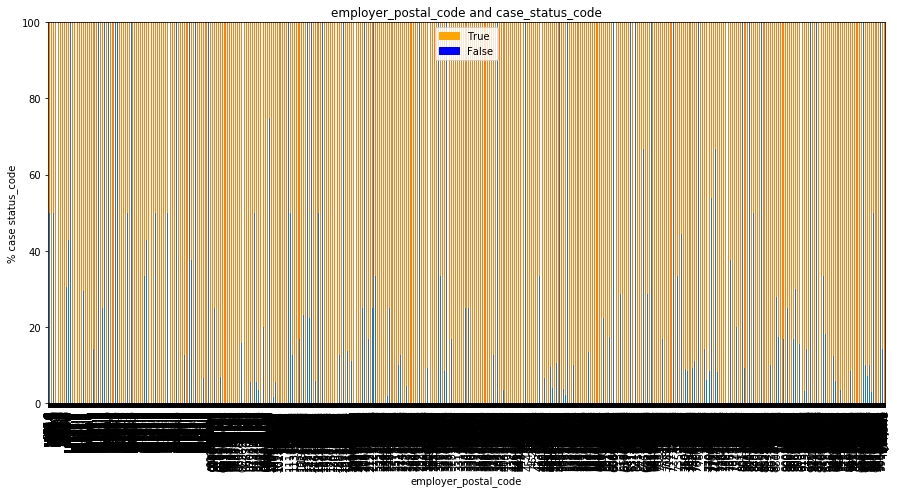

In [30]:
# employer_postal_code                                                 
employer_postal_code = pd.unique(df_new.employer_postal_code.ravel())

df_new['percent'] = 0

for i in employer_postal_code:
    count = 1 / df_new[df_new.employer_postal_code== i].count()['employer_postal_code']
    index_list = df_new[df_new['employer_postal_code'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','employer_postal_code','case_status_code']].groupby(['employer_postal_code','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="employer_postal_code and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("employer_postal_code")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

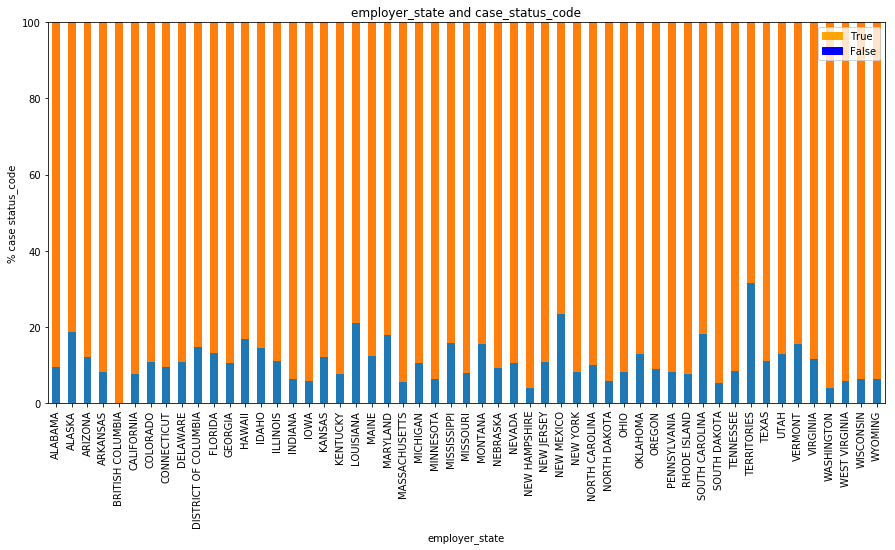

In [28]:
# employer_state                                                 
employer_state = pd.unique(df_new.employer_state.ravel())

df_new['percent'] = 0

for i in employer_state:
    count = 1 / df_new[df_new.employer_state== i].count()['employer_state']
    index_list = df_new[df_new['employer_state'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','employer_state','case_status_code']].groupby(['employer_state','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="employer_state and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("employer_state")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

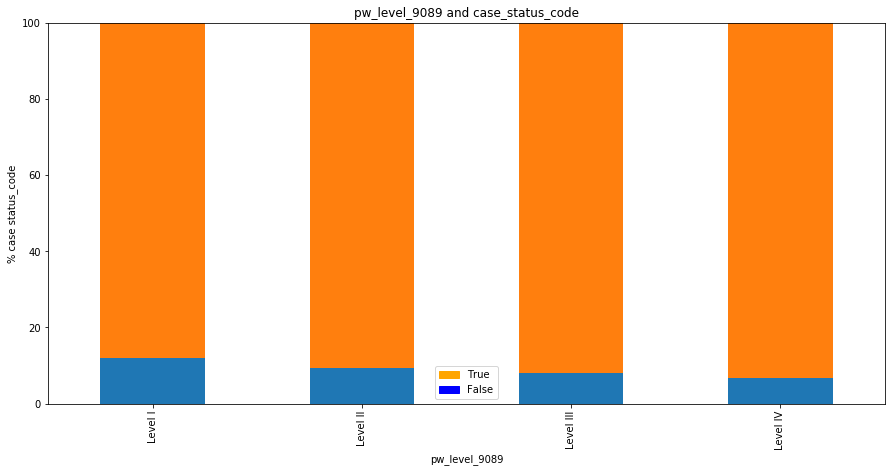

In [31]:
# pw_level_9089                                                 
pw_level_9089 = pd.unique(df_new.pw_level_9089.ravel())

df_new['percent'] = 0

for i in pw_level_9089:
    count = 1 / df_new[df_new.pw_level_9089== i].count()['pw_level_9089']
    index_list = df_new[df_new['pw_level_9089'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','pw_level_9089','case_status_code']].groupby(['pw_level_9089','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="pw_level_9089 and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("pw_level_9089")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

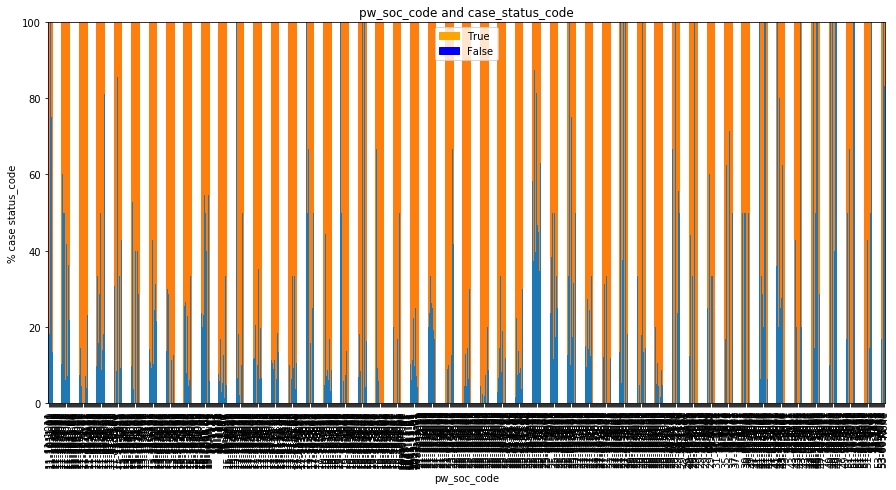

In [32]:
# pw_soc_code                                                 
pw_soc_code = pd.unique(df_new.pw_soc_code.ravel())

df_new['percent'] = 0

for i in pw_soc_code:
    count = 1 / df_new[df_new.pw_soc_code== i].count()['pw_soc_code']
    index_list = df_new[df_new['pw_soc_code'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','pw_soc_code','case_status_code']].groupby(['pw_soc_code','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="pw_soc_code and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("pw_soc_code")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

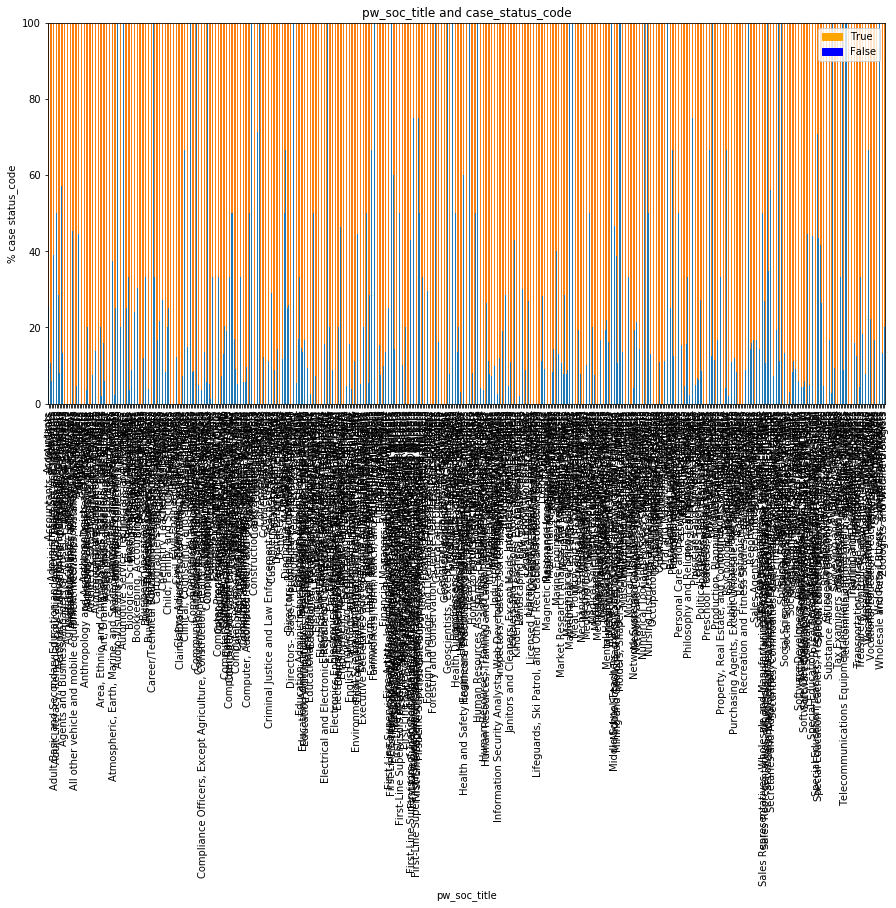

In [33]:
# pw_soc_title                                                 
pw_soc_title = pd.unique(df_new.pw_soc_title.ravel())

df_new['percent'] = 0

for i in pw_soc_title:
    count = 1 / df_new[df_new.pw_soc_title== i].count()['pw_soc_title']
    index_list = df_new[df_new['pw_soc_title'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','pw_soc_title','case_status_code']].groupby(['pw_soc_title','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="pw_soc_title and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("pw_soc_title")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

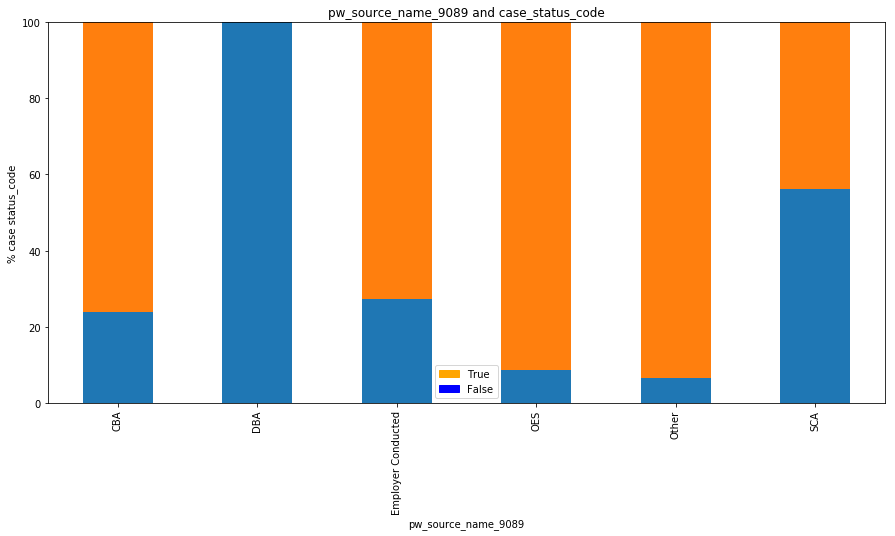

In [34]:
# pw_source_name_9089                                                 
pw_source_name_9089 = pd.unique(df_new.pw_source_name_9089.ravel())

df_new['percent'] = 0

for i in pw_source_name_9089:
    count = 1 / df_new[df_new.pw_source_name_9089== i].count()['pw_source_name_9089']
    index_list = df_new[df_new['pw_source_name_9089'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','pw_source_name_9089','case_status_code']].groupby(['pw_source_name_9089','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="pw_source_name_9089 and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("pw_source_name_9089")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

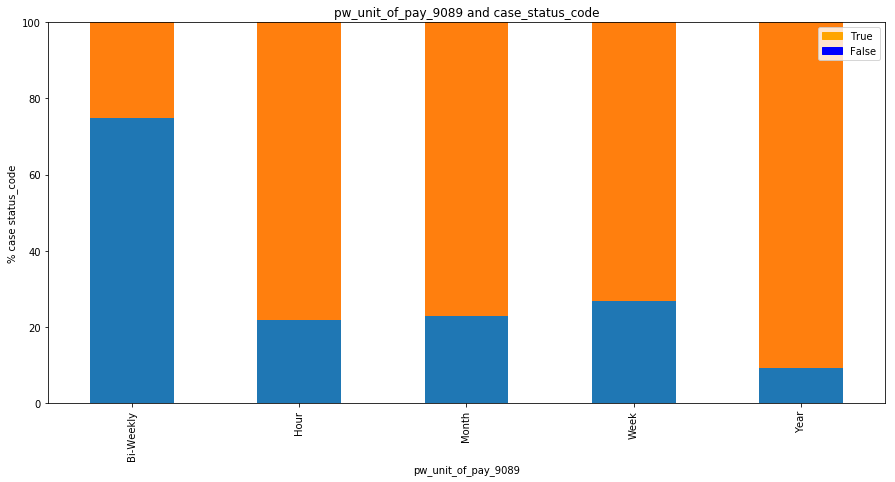

In [35]:
# pw_unit_of_pay_9089                                                 
pw_unit_of_pay_9089 = pd.unique(df_new.pw_unit_of_pay_9089.ravel())

df_new['percent'] = 0

for i in pw_unit_of_pay_9089:
    count = 1 / df_new[df_new.pw_unit_of_pay_9089== i].count()['pw_unit_of_pay_9089']
    index_list = df_new[df_new['pw_unit_of_pay_9089'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','pw_unit_of_pay_9089','case_status_code']].groupby(['pw_unit_of_pay_9089','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="pw_unit_of_pay_9089 and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("pw_unit_of_pay_9089")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

/Users/Eimg/anaconda3/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


(0, 100)

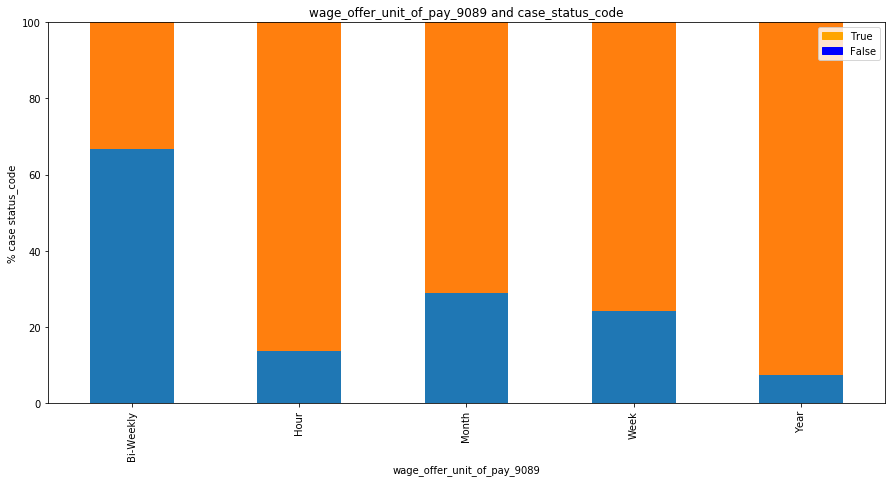

In [36]:
# wage_offer_unit_of_pay_9089                                                 
wage_offer_unit_of_pay_9089 = pd.unique(df_new.wage_offer_unit_of_pay_9089.ravel())

df_new['percent'] = 0

for i in wage_offer_unit_of_pay_9089:
    count = 1 / df_new[df_new.wage_offer_unit_of_pay_9089== i].count()['wage_offer_unit_of_pay_9089']
    index_list = df_new[df_new['wage_offer_unit_of_pay_9089'] == i].index.tolist()
    for j in index_list:
        df_new.loc[j, 'percent'] = count * 100
        
group = df_new[['percent','wage_offer_unit_of_pay_9089','case_status_code']].groupby(['wage_offer_unit_of_pay_9089','case_status_code']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="wage_offer_unit_of_pay_9089 and case_status_code", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='True')
blue_patch = mpatches.Patch(color='blue', label='False')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("wage_offer_unit_of_pay_9089")
my_plot.set_ylabel("% case status_code")
my_plot.set_ylim([0,100])

In [ ]:
df_new.select_dtypes(['object']).describe().T

## Discussion on plots shown above
As some of the variables have a very high cardinality, e.g. employer_address_1, employer_name, employer_postal_code, employer_city, decision_date and pw_job_title_9089. Plotting these features as stacked bar charts has no value as it becomes impossible to see which, of which there may be many, categories are more likely to be in the certified versus denied group. 

Of the other variables of interest which we plotted, the employer state chart shows that some states like New Hampshire, Washington, North Dakota and South Dakota are are associated with more certified statuses than denied. Whereas Montana, Alaska, Maryland and the territories are associated with more denied status codes. 

Pw_level_9089 (level of the prevailing wage determination) does not tell us much but that Level IV is slightly more associated with certified than denied cases. Equally, of the pw_source_name_9089 (name of the entity providing prevailing wage information for the job) categories only OES and Other are associated with more certified cases, and DBA and SCA are only associated with denied cases. Of the wage_offer_unit_of_pay_9089, year is the only category associated more so with certified cases, whereas bi-weekly is associated with no certified cases. The same is true for pw_unit_of_pay_9089.

We picked out a number of variables of interest that we would investigate, and potentially manipulate, further, namely: country_of_citizenship, decision date, employer_name, employer_state, pw_job_title_9089, and pw_soc_title. We chose to investigate the country of citizenship as we were interested to see whether cases were more likely to be certified based on the worker coming from a certain country or region. However, as the cardinality is very high we need to investigate how we can prepare this in a more appropriate fashion for modelling. We choose also to explore the employer state as we were interested to know whether some states are associated with a higher number of certified cases, and for what reason that might be. We are interested in the decision date, as we hypothesize that the outcomes of visa applications may be affected by the political climate, so we may see changes as the US changed presidents in 2016. We chose to investigate employer name as we considered this a feature that would indicate that industries and company sizes were associated with more certified cases. We were also interested in job titles as we hypothesize that certain job titles will more likely to be granted certified. We think that visas for jobs associated with the tech industry and based in hubs like California may be more likely to be certified. 